<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Problemas de clasificación y regresión.
* Regresión lineal ordinaria (mínimos cuadrados).
* Selección de atributos y parámetros de regularización en regresión lineal (Ridge y Lasso).
* Validación cruzada.
* Reducción de dimensionalidad: PCA e ICA.
* Selección de hiper-parámetros estructurales de modelos de aprendizaje.

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y discusión: 4 Octubre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea1-INF393-II-2019]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Máquinas de aprendizaje aplicadas a la medicina  
[2.](#segundo) Estimación de edad de personas

<a id="primero"></a>
## 1. Máquinas de aprendizaje aplicadas a la medicina
En el area de la salud, diagnosticar la enfermedad de una persona de forma rápida y correcta puede llegar a salvarle la vida. Los encargados de realizar estos diagnósticos, son médicos que, observando exámenes y ciertos indicadores, pueden concluir qué enfermedad presenta el paciente. Si el médico se llegase a equivocar, aparte de que el paciente pueda perder la vida, el medico podría ser demandado por negligencia arriesgando años de cárcel o pagar sumas de dinero considerable, es por estas razones que es importante no cometer errores.  
Pongámonos en el contexto de que usted es contratado para utilizar técnicas de aprendizaje de máquina para asistir en un problema médico como es la detección de enfermedades cardiacas. El diagnóstico de una enfermedad cardiaca se realiza a través de signos clínicos y resultados de pruebas médicas, los cuales usted deberá utilizar en busca del comportamiento normal y anormal de los pacientes, para así obtener un modelo que prediga si el paciente en efecto presenta una enfermedad o no.


<img src="https://www.scripps.edu/_files/images/science-and-medicines/600x400_heart_illustration_xray.jpg" width="35%" />


Los datos para trabajar junto a su documentación pueden ser descargados ejecutando los siguientes comandos en un terminal (*sistemas UNIX*):
```
wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat
wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.doc
```

---
Cargue los datos a trabajar en un *dataframe* de pandas. Exprese las variables que tienen valores categóricos en su estructura original, para así tener una información más clara de lo que significa en un comienzo. 



In [43]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv("Parte1/heart.dat", header=None, names=headers, sep=' ')
Copiadf = pd.read_csv("Parte1/heart.dat", header=None, names=headers, sep=' ')


> a) Visualice los datos trabajados describiendo el comportamiento de las variables para entender el problema al que se enfrenta. ¿Qué ocurre con el comportamiento entre pacientes sanos y enfermos? Haga gráficos si estima conveniente (histogramas, boxplots, etc).


In [44]:
df.corr(method ='pearson')

,age,sex,chest_pain,blood_p,serum,blood_s,electro,max_heart,angina,oldpeak,slope,vessel,thal,normal
age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
chest_pain,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
blood_p,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
serum,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
blood_s,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
electro,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
max_heart,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
oldpeak,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


En la tabla anterior se puede observar la correlacion individual entre las variables, lo que si bien no entrega informacion definitiva, dado que no entrega como la convinación de variables se correlaciona con el estar enfermo o no, sirve como un primer aproach a conocer las posibles causas de la enfermedad y en este caso podemos observar que las variables que mas se correlacionan con si la persona esta normal o no son: chest_pain, angina, oldpeak, vessel y thal, por lo que con esas variables se analizara el comportamiento de los sanos y enfermos

In [45]:
import matplotlib.pyplot as plt
sanos = df['normal'][df['normal'] == 1] 
enfermos = df['normal'][df['normal'] == 2]

grouped_data = df.groupby('normal')
grouped_data['chest_pain'].describe()

,count,mean,std,min,25%,50%,75%,max
normal,,,,,,,,
1,150.0,2.820000,0.927362,1.0,2.0,3.0,3.75,4.0
2,120.0,3.616667,0.779823,1.0,4.0,4.0,4.00,4.0


In [46]:
grouped_data['angina'].describe()

,count,mean,std,min,25%,50%,75%,max
normal,,,,,,,,
1,150.0,0.153333,0.361516,0.0,0.0,0.0,0.0,1.0
2,120.0,0.550000,0.499580,0.0,0.0,1.0,1.0,1.0


In [47]:
grouped_data['oldpeak'].describe()

,count,mean,std,min,25%,50%,75%,max
normal,,,,,,,,
1,150.0,0.622667,0.800851,0.0,0.0,0.2,1.175,4.2
2,120.0,1.584167,1.282067,0.0,0.6,1.4,2.425,6.2


In [48]:
grouped_data['vessel'].describe()

,count,mean,std,min,25%,50%,75%,max
normal,,,,,,,,
1,150.0,0.286667,0.648557,0.0,0.0,0.0,0.0,3.0
2,120.0,1.150000,1.034286,0.0,0.0,1.0,2.0,3.0


In [49]:
grouped_data['thal'].describe()

,count,mean,std,min,25%,50%,75%,max
normal,,,,,,,,
1,150.0,3.786667,1.556914,3.0,3.0,3.0,3.0,7.0
2,120.0,5.833333,1.769648,3.0,3.0,7.0,7.0,7.0


In [50]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'
df['chest_pain'][df['chest_pain'] == 1] = 'typical angina'
df['chest_pain'][df['chest_pain'] == 2] = 'atypical angina'
df['chest_pain'][df['chest_pain'] == 3] = 'non-anginal pain'
df['chest_pain'][df['chest_pain'] == 4] = 'asymptomatic'
df['blood_s'][df['blood_s'] == 0] = 'lower than 120mg/ml'
df['blood_s'][df['blood_s'] == 1] = 'greater than 120mg/ml'
df['electro'][df['electro'] == 0] = 'normal'
df['electro'][df['electro'] == 1] = 'ST-T wave abnormality'
df['electro'][df['electro'] == 2] = 'left ventricular hypertrophy'
df['angina'][df['angina'] == 0] = 'no'
df['angina'][df['angina'] == 1] = 'yes'
df['slope'][df['slope'] == 1] = 'upsloping'
df['slope'][df['slope'] == 2] = 'flat'
df['slope'][df['slope'] == 3] = 'downsloping'
df['thal'][df['thal'] == 3] = 'normal'
df['thal'][df['thal'] == 6] = 'fixed defect'
df['thal'][df['thal'] == 7] = 'reversable defect'

In [51]:
df

,age,sex,chest_pain,blood_p,serum,blood_s,electro,max_heart,angina,oldpeak,slope,vessel,thal,normal
0,70.0,male,asymptomatic,130.0,322.0,lower than 120mg/ml,left ventricular hypertrophy,109.0,no,2.4,flat,3.0,normal,2
1,67.0,female,non-anginal pain,115.0,564.0,lower than 120mg/ml,left ventricular hypertrophy,160.0,no,1.6,flat,0.0,reversable defect,1
2,57.0,male,atypical angina,124.0,261.0,lower than 120mg/ml,normal,141.0,no,0.3,upsloping,0.0,reversable defect,2
3,64.0,male,asymptomatic,128.0,263.0,lower than 120mg/ml,normal,105.0,yes,0.2,flat,1.0,reversable defect,1
4,74.0,female,atypical angina,120.0,269.0,lower than 120mg/ml,left ventricular hypertrophy,121.0,yes,0.2,upsloping,1.0,normal,1
5,65.0,male,asymptomatic,120.0,177.0,lower than 120mg/ml,normal,140.0,no,0.4,upsloping,0.0,reversable defect,1
6,56.0,male,non-anginal pain,130.0,256.0,greater than 120mg/ml,left ventricular hypertrophy,142.0,yes,0.6,flat,1.0,fixed defect,2
7,59.0,male,asymptomatic,110.0,239.0,lower than 120mg/ml,left ventricular hypertrophy,142.0,yes,1.2,flat,1.0,reversable defect,2
8,60.0,male,asymptomatic,140.0,293.0,lower than 120mg/ml,left ventricular hypertrophy,170.0,no,1.2,flat,2.0,reversable defect,2
9,63.0,female,asymptomatic,150.0,407.0,lower than 120mg/ml,left ventricular hypertrophy,154.0,no,4.0,flat,3.0,reversable defect,2


De las tablas obtenidas para los valores mas significativos y el dataframe con los valores discretizados podemos decir que las personas enfermas tienden a tener dolor en el pecho sin mostrar sintomas en comparacion con las personas sanas que tienden a deberse a las otras tres causas, mas de la mitad presenta angina mientras que en las personas sanas menos de un cuarto la presenta, además una depresión del ST inducida por el ejercicio relativo al descanso mayor al de las personas sanas por un punto promedio de un maximo de 6.2, una cantidad mayor de vasos sanguineos que las personas sanas y su thal tiende a tener un defecto fijo en comparacion con el de las personas sanas que es normal


> b) Debido a que utilizaremos modelos lineales, necesitaremos una representación adecuada de los datos. Codifique las variables con valores categóricos para ser representados como *one hot vectors*, indicando con un 1 la presencia del atributo en cuestión. Por ejemplo, si un paciente tiene el atributo "sex: female", quedará codificado como [0,1], mientras que si tiene el atributo "sex: male", quedará como [1,0]. **Explique la importancia de éste paso.**


La importancia de este paso es debido a que los algoritmos de machine learning toman las variables categoricas mientras más cercanas más similares, por ejemplo en un vector [1,3,4] tomara el 3 mas cercano al 4, siendo que quizas eso se desvia totalmente de lo que se buscaba representar con esos datos

In [52]:
df = pd.get_dummies(df)
df.head()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal,sex_female,sex_male,chest_pain_asymptomatic,...,electro_left ventricular hypertrophy,electro_normal,angina_no,angina_yes,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,70.0,130.0,322.0,109.0,2.4,3.0,2,0,1,1,...,1,0,1,0,0,1,0,0,1,0
1,67.0,115.0,564.0,160.0,1.6,0.0,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1
2,57.0,124.0,261.0,141.0,0.3,0.0,2,0,1,0,...,0,1,1,0,0,0,1,0,0,1
3,64.0,128.0,263.0,105.0,0.2,1.0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
4,74.0,120.0,269.0,121.0,0.2,1.0,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0


### Predecir la presión sanguínea

En primera instancia trabajaremos en el dominio de regresión para predecir el comportamiento de alguna de las variables involucradas con el fin de entender cómo se comportan y si es posible estimar alguna de ellas a partir de las otras. Como ayuda se le indica que una alta presión sanguínea (*blood preasure*) podría ser un indicador de riesgo en temas cardíacos, en específico, para el problema se le comenta la hipótesis de que el comportamiento anormal de la variable presión sanguínea es un buen indicador para la detección de enfermedades cardíacas. 
Su objetivo dada esta información será la de predecir el comportamiento de esta variable en función de las otras, para luego detectar qué tan distante es el valor real al valor predecido y así detectar las enfermedades.


> c) Extraiga la información de la enfermedad cardíaca (*clase binaria*) además de la variable continua que nos intereserá predecir en esta instancia (*target*) con un modelo de regresión lineal.



In [53]:
class_label = df.pop("normal").values -1 # 0 means absence, 1 means presence
reg_label = df.pop("blood_p").values
X_data = df.values

In [54]:
print (reg_label.mean())
print (reg_label.std())

131.34444444444443
17.828500556658305


> d) Cree un conjunto de pruebas para evaluar los modelos construidos en el problema. Extraiga el 30\% de los datos del conjunto total para representar el conjunto de pruebas.

In [55]:
np.random.seed(0)
mask_test = np.random.rand(X_data.shape[0]) < 0.30
...
X_train = X_data[~mask_test]
X_test = X_data[mask_test]
print(X_train)
reg_label_train = reg_label[~mask_test] 
reg_label_test = reg_label[mask_test]


class_label_train = class_label[~mask_test] 
class_label_test = class_label[mask_test]
...
print("Train: ",X_train.shape)
print("Test: ",X_test.shape)

[[ 70. 322. 109. ...   0.   1.   0.]
 [ 67. 564. 160. ...   0.   0.   1.]
 [ 57. 261. 141. ...   0.   0.   1.]
 ...
 [ 52. 199. 162. ...   0.   0.   1.]
 [ 56. 294. 153. ...   0.   1.   0.]
 [ 67. 286. 108. ...   0.   1.   0.]]
Train:  (184, 24)
Test:  (86, 24)


> e) Realice una estandarización normal de los datos de entrada al modelo (*input*). **Comente la importancia/conveniencia de realizar este paso**. 

In [56]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
Xstd_train = std.transform(X_train) 
Xstd_test = std.transform(X_test)
print(Xstd_train)

[[ 1.6925911   1.29249516 -1.79283968 ... -0.26413527  0.90652202
  -0.79266549]
 [ 1.36139284  5.76291806  0.49427391 ... -0.26413527 -1.10311716
   1.26156621]
 [ 0.25739865  0.16565302 -0.35778802 ... -0.26413527 -1.10311716
   1.26156621]
 ...
 [-0.29459845 -0.97966194  0.58396464 ... -0.26413527 -1.10311716
   1.26156621]
 [ 0.14699923  0.77525615  0.18035636 ... -0.26413527  0.90652202
  -0.79266549]
 [ 1.36139284  0.62747357 -1.83768504 ... -0.26413527  0.90652202
  -0.79266549]]


La conveniencia de este paso es que, al realizar una normalización estandar de las v.a se asume que el valor independiente e de la regresión lineal y = f(x) + e (donde e es el residuo) tiene a seguir una distribución normal N ~ (0,1), para poder asumir que el valor esperado de y, seria igual a el valor de la función que se busca encontrar para estimar ese Y, Ademas el supuesto de normalidad sirve para realizar Z-score

> f) Realice una regresión lineal de mı́nimos cuadrados básica para predecir el nivel de presión sanguínea. Mida los errores de predicción para cada dato en el conjunto de entrenamiento. Utilizando un *quantile-quantile plot* determine si es razonable la hipótesis de normalidad sobre los residuos del modelo.

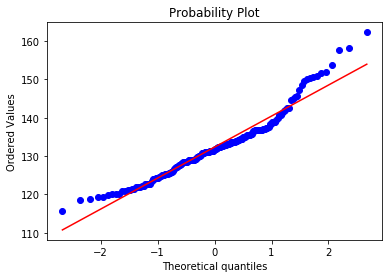

In [57]:
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import pylab
model = LinearRegression(fit_intercept=True)
model.fit(Xstd_train, reg_label_train)
reg_pred_train = model.predict(Xstd_train)
reg_pred_test = model.predict(Xstd_test)
reg_pred_train

stats.probplot(reg_pred_train, dist="norm", plot=pylab)
pylab.show()

Al observar el gráfico podemos ver que si es posible asumir el supuesto de normalidad sobre los residuos ya que los puntos de la función estimada es bastante proxima a la función teorica


> g) Construya una tabla con los pesos, Z-score y F-score correspondientes a cada predictor (variable), compare estos valores. ¿Qué sucede si hacemos un raking de los atributos en base al peso obtenido en la regresión? ¿Qué variables están más correlacionadas con la respuesta?

La tabla con los pesos se construyo en el inciso a, a través de una correlación de pearson, obteniendose asi que el ranking de las 5 variables mas relevantes son, en orden de prioridad: chest_pain, angina, oldpeak, vessel y thal, las cuales son las variables mas correlacionadas con la respuesta

In [58]:
#### z-score
pd.options.mode.chained_assignment = None  # default='warn'
headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv("Parte1/heart.dat", header=None, names=headers, sep=' ')

cols = list(df.columns)
MyEmptydf = pd.DataFrame()
#a cuantas desviaciones estandares se encuentra, asumiendo normalidad

#print(df['normal'][0])
Lista_z_scores = []

for col in cols:
    col_zscore = col + '_zscore'
    numerador = 0
    divisor = 0
    for i in range(270):
        numerador = numerador + (df[col][i] - df[col].mean())*(df['normal'][i] - df['normal'].mean())
        divisor = divisor + (df[col][i] - df[col].mean())**2
    
    Z_score_variable_col = ((df[col].std(ddof=0))**2)*(numerador / ((divisor)**0.5))
    string = str(col_zscore) + " = " + str(Z_score_variable_col)
    Lista_z_scores.append(string)
    print(string)

age_zscore = 143.31314071086254
sex_zscore = 0.53089214205329
chest_pain_zscore = 3.0652261754358
blood_p_zscore = 403.2613034197523
serum_zscore = 2564.7809566262267
blood_s_zscore = -0.01681526817667055
electro_zscore = 1.4750175169480344
max_heart_zscore = -1827.02430768506
angina_zscore = 0.7565246653964844
oldpeak_zscore = 4.459184852261591
slope_zscore = 1.036701910078752
vessel_zscore = 3.300076049832321
thal_zscore = 16.08486636318541
normal_zscore = 2.0160409405622857


In [59]:
#F-score
MatrizFant = Copiadf.corr(method ='pearson')
copiacols = list(MatrizFant.columns)

Lista_f_scores=[]
suma=0
for col in cols:
    col_fscore = col + '_fscore'
    numerador = 0
    divisor = 0
    for i in range(270):
        numerador = numerador + (df[col][i] - df[col].mean())
        SST=((df['normal'][i] - df['normal'].mean())**2)

        divisor = divisor + (df[col][i] - df[col].mean())**2
    #print ("NUMERADOR= ",(numerador / ((divisor)0.5)))
    #print ("d",(df[col].std(ddof=1))2)
    Correlation=np.corrcoef(df[col], df['normal'])[0][1]
    suma=suma+Correlation
    #print("corre",Correlation[0][1])
    Corr=Correlation*2
    SSR=SST*Corr
    SSE=SSR-SST
    F_score_variable_col = Corr/(1-Corr)
    #print("corre",Correlation[0][1])
    string = str(col_fscore) + " = " + str(F_score_variable_col)
    Lista_f_scores.append(string)
    print(string)
print("suma=",suma)

age_fscore = 0.738055484907009
sex_fscore = 1.471830472720097
chest_pain_fscore = 5.055923226424215
blood_p_fscore = 0.4508846085675252
serum_fscore = 0.3089708742518277
blood_s_fscore = -0.03160611828397446
electro_fscore = 0.5727759067650401
max_heart_fscore = -0.4556424628533371
angina_fscore = 5.195994871489303
oldpeak_fscore = 5.095140552736298
slope_fscore = 2.0791202847277623
vessel_fscore = 10.194811099697272
thal_fscore = -20.983746849488295
normal_fscore = -2.0
suma= 4.1033831788735835



> h) Para evaluar la calidad de las predicciones del modelo sobre el problema utilice el error absoluto medio (*mean absolute error*). Comente los resultados sobre en ambos conjuntos y la interpretación que se le da a la métrica de evaluación en el problema.


Tomando en cuenta que los errores tienen valores sobre los 250, se puede ver claramente que las variables utilizadas para predecir Y se encuentran a una distancia considerable de la perfeccion (MAE=0) teniendo asi un modelo que no podra tener una accuracy del 100%.

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE train: ", mean_squared_error(reg_label_train, reg_pred_train))
print("MSE test: ", mean_squared_error(reg_label_test, reg_pred_test))


MSE train:  259.62929877777003
MSE test:  263.18518886286864


> i) Estime la calidad del modelo usando validación cruzada con un número de *fold* igual a $K=1$ (*leave-one-out*) y $K=5$. Recuerde que para que la estimación sea razonable, en cada configuración (*fold*) deberá reajustar los pesos del modelo. Compare esta estimación *vs* la calidad real (en conjunto de pruebas) y concluya.


In [67]:
from sklearn.model_selection import KFold
for K in (len(Xstd_train)-1,5):
    kf = KFold(n_splits=K)
    print ("k=",K)
    mse_cv = 0
    for train, val in kf.split(Xstd_train):
        linreg = LinearRegression(fit_intercept=True)
        linreg.fit(Xstd_train[train], reg_label_train[train])
        yhat_kfold_val = linreg.predict(Xstd_train[val])
        mse_fold =  np.mean( np.square(yhat_kfold_val - reg_label_train[val]) )
        mse_cv += mse_fold
    mse_cv = mse_cv / K
    print(mse_cv)

k= 183
331.88952292328565
k= 5
362.10088054075237


> j) Debido a la creación de varias columnas *dummys* en el punto b), experimente con técnicas de regularización para mejorar el desempeño de su modelo. Para ésto ajuste un modelo lineal utilizando "*Ridge Regression*", es decir, regularizando con la norma $l_2$, varíe los parámetros de regularización si estima conveniente. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. 

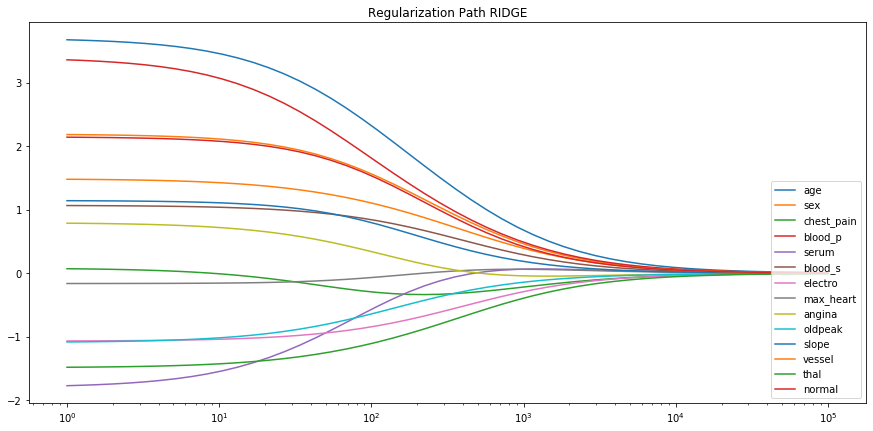

In [62]:
from sklearn.linear_model import Ridge
alphas_ = np.logspace(5,0, base=10)
coefs = []
model = Ridge(fit_intercept=True, solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='lower right')
plt.show()

Podemos observar que los coeficientes convergen mas rapido mientras mayor es el parametro de regularización, esto significa que mientras más rapido el coeficiente de una caracteriztica converga a 0, menos importancia tiene esta caracteriztica


> k) Ahora experimente regularizando con la norma $l_1$, lo que corresponde a utilizar el método "*Lasso*". Vuelva a realizar el gráfico mostrando los coeficientes obtenidos, describa lo que observa. ¿Es más efectivo *Lasso* para seleccionar atributos?


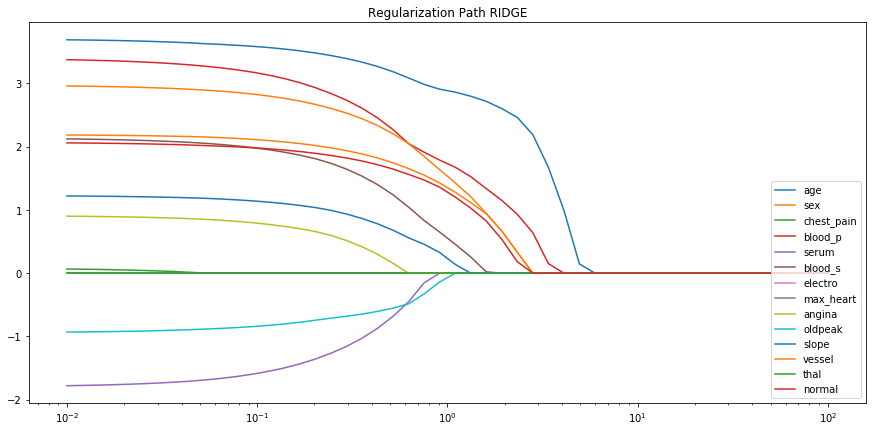

In [63]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='lower right')
plt.show()

En este grafico podemos observar lo mismo que en el grafico de ridge, sin embargo aqui los parametros convergen a cero mas abruptamente, lo que permite mayor facilidad en la identificación de cuales parametros son mas importantes

> l) Evalúe la calidad de estos dos modelos en ambos conjuntos a distintos valores del parámetro de regularización. Haga uso de la *widget* interactiva de *ipython*. Comente ¿Con qué valor de *alpha* se quedaría en cada caso?

In [64]:
from ipywidgets import interactive
def train_model(param):
    model = Ridge(fit_intercept=True, solver='svd')#define the model (Ridge and Lasso) 
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
p_min = -10 #define your range
p_max = 10 #define your range
interactive(train_model, param=(p_min,p_max))


interactive(children=(IntSlider(value=0, description='param', max=10, min=-10), Output()), _dom_classes=('widg…

In [65]:
from ipywidgets import interactive
def train_model(param):
    model = Lasso(fit_intercept=True)#define the model (Ridge and Lasso) Ridge(fit_intercept=True, solver='svd')
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
p_min = -10 #define your range
p_max = 10 #define your range
interactive(train_model, param=(p_min,p_max))


interactive(children=(IntSlider(value=0, description='param', max=10, min=-10), Output()), _dom_classes=('widg…

En el caso de la ridge regresión el parametro alpha al llegar a 100000 recién entrega los valores de mean absolute error obtenidos para el modelo de entrenamiento


> m) De manera más estricta un médico le solicita un modelo que solo cuente con 5 características (variables) para predecir el nivel de presión sanguínea. Usted bien conoce un método que selecciona características de manera iterativa (*greedy*), con la idea de que la característica seleccionada tenga el mejor aporte sobre el desempeño del modelo. Construya una función que implemente *Forward Step-wise Selection* (FSS) sobre el modelo de regresión lineal clásico.  Para seleccionar localmente una característica, **proponga/implemente un criterio distinto al utilizado en el código de ejemplo** (**no** utilice el conjunto de pruebas). Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo.

In [66]:

def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LinearRegression(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train =  predictions_train - y
            error_candidate =  np.mean(np.power(residuals_train, 2))
            score_candidates.append((error_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print("selected = %s ..."%names_x[best_candidate])
        print("totalvars=%d, mse = %f"%(len(indexes),best_new_score))
    return selected
features_fss = fss(Xstd_train, reg_label_train, names_regressors)
need_feat = features_fss[:5]


AttributeError: 'range' object has no attribute 'remove'


> n) Realice otra modificación al algoritmo FSS anterior, en donde se deba entrenar el modelo predictor una sola vez. Cree alguna huerística de selección que le permita realizar ésto.



> o) Realice una modificación a los datos y agregue entre 10 a 100 atributos falsos, es decir, atributos aleatorios generados que no tienen relación con la variable de predicción (*target*). Para ésto utilice una distribución normal con valor esperado diferente de 0 y una cierta desviación estándar. Utilice alguna de las técnicas de selección de atributos (Ridge, Lasso, FSS) para evaluar la efectividad en eliminar estos atributos falsos ¿Depende del nivel de ruido (desviación estándar)?
```python
D = #number of fake features
F = np.random.normal(loc = mu, scale = std, size=(N,D) ) #fake features
X_new_train= np.concatenate([Xstd_train, F], axis=-1)
```




### Detectar una enfermedad 
Con toda la información obtenida de la experimentación previa, deberá hacer la predicción de la enfermedad cardíaca, ésto es un problema binario de clasificación de dos clases (presencia o ausencia de la enfermedad). Para explorar la hipótesis que le fue entregada en un inicio, de que el comportamiento anormal (*outlier*) de presión sanguínea sobre las personas es un indicio de alguna enfermedad, deberá utilizar los datos de los pacientes que se encuentran sanos (comportamiento normal).

> p) Entrene un modelo de regresión lineal, el mejor explorado en la experimentación previa, para predecir la presión sanguínea de los pacientes sanos, así obtener un modelo que estima cuál debiera ser el nivel sanguíneo en base al resto de información del paciente.
```python
mask_norm = class_label_train == 0 
model = #choose yor model..
model.fit(Xstd_train[mask_norm], reg_label_train[mask_norm])
...
blood_p_tr = model.predict(Xstd_train) 
blood_p_te = model.predict(Xstd_test) 
```



> q) Realice una clasificación de los pacientes a través de definir un umbral de decisión óptimo sobre la presión sanguínea estimada por el modelo. Por ejemplo, una cantidad mayor a $p$ es considerado como anormal (enfermo). Para ésto utilice la distribución predicha de este atributo para poder separar correctamente entre los dos tipos de comportamiento, normal (sano) y anormal (enfermo).
```python
import seaborn as sns
sns.distplot(blood_p_tr[mask_norm], label="normal behavior")
sns.distplot(blood_p_tr[~mask_norm], label="ill person behavior")
plt.show()
def predict_umbr(data, umbral_up, umbral_low):
    preds = []
    for value in data:
        if value > umbral_up or value < umbral_low:
            preds.append(1) #presencia
        else:
            preds.append(0)
    return np.asarray(preds)
pred_train = predict_umbr(blood_p_tr, p_up, p_low)
pred_test = predict_umbr(blood_p_te, p_up, p_low)
```



> r) Mida la calidad de la clasificación entregada a través de la exactitud (*accuracy*) sobre ambos conjuntos. Evalúe si es necesario variar la decisión sobre el umbral del punto anterior. *Recuerde que, al ser un problema binario, el mínimo que se espera es por sobre 50\%*
```python
from sklearn.metrics import accuracy_score
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 
```



> s) Compare su *framework* de clasificación con un modelo lineal simple de clasificación binaria como el *perceptrón*, el cual se entrenará para aprender directamente la tarea (de manera supervisada), sin utilizar la información de presión sanguínea. Comente sobre las diferencias, ventajas y desventajas, de cada *approach*.
```python
from sklearn.linear_model import Perceptron
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(Xstd_train, class_label_train)
pred_train = model.predict(Xstd_train) 
pred_test = model.predict(Xstd_test)
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 
```



> t) Para poder darle una explicación más visual a la clasificación de ambos modelos, y así entender mejor dónde podría estar el error, proyecte los datos en 2 dimensiones. Utilice la técnica de reducción de dimensionalidad **PCA** para representar los datos en las dimensiones deseadas. Comente sobre el comportamiento, puede colorear los datos dado el estado del paciente (enfermedad) y/o la predicción de alguno de los modelos (Perceptrón o con umbral).
```python
from sklearn.decomposition import PCA
d = 2
pca_model = PCA(n_components=d)
pca_model.fit(Xstd_train)
X_pca_train = pca_model.transform(Xstd_train)
X_pca_test = pca_model.transform(Xstd_test)
plt.scatter(X_pca_train[:,0], X_pca_train[:,1])
plt.show()
```



> u) Vuelve a realizar lo anterior pero con otra técnica de reducción de dimensionalidad, como por ejemplo **ICA** [[3]](#refs). Comente
```python
from sklearn.decomposition import FastICA
...
```



> v) ¿Qué tanto se ve afectada la calidad de predicción si se utiliza la representación reducida generada por PCA vs la representación original? ¿Es esperable este fenómeno? ¿Podría mejorar la calidad de predicción? Proponga e implemente un criterio para seleccionar el número de componentes $d$ en PCA. Comente

<a id="segundo"></a>
## 2. Estimación de edad de personas
El problema de inferir ciertas características de una persona a través de una foto de ella puede resultar bastante dificil incluso para nosotros, como por ejemplo de qué país es, la emoción que expresa, la edad que tiene, o el género. La automatización de este proceso para que máquinas logren identificar ciertas características de una persona puede ser algo crucial para el futuro desarrollo de Inteligencia Artificial.

<img src="https://i.imgur.com/6B072GE.jpg" width="60%" height="20%" />


En esta actividad trabajaremos con unos datos (imágenes) en el **objetivo** de predecir la **edad** (*target value*) de la persona presente en la imagen. Los datos corresponden a 3640 imágenes de rostros de personas extraídos de la plataforma Flickr, pero, debido a que trabajamos con redes *feed forward*, se trabajará con representaciones de alto nivel, extraídas manualmente (no-aprendibles). Para ésto necesitará descargar los datos del siguiente __[link](http://chenlab.ece.cornell.edu/people/Andy/ImagesOfGroups.html)__ en el extracto de *ageGenderClassification* o a través de la consola Unix.
```
wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/ageGenderClassification.zip
```

Se trabajará con archivos *.mat* que pueden ser cargados de la siguiente manera:

Mientras que para acceder a la información como tal:

In [ ]:
import scipy.io as sio
mat_file = sio.loadmat("eventrain.mat")
mat_file1 = sio.loadmat("eventest.mat")


data = mat_file["trcoll"][0][0] # is "tecoll" for testing set
data_tr = mat_file["trcoll"][0][0] # is "tecoll" for testing set

age_true = data[1] #target
...
genFeat = data[0]   # Contextual features
ffcoefs = data[3]   # Fisherface space
faceGist = data[4]  # GIST features
Input_t=[]
print ("len data",len(data))
con=0
#
def Fix_input(data):
    for i in range(len(data[0])):
        aux=[]
        for j in range (len(data)):        
            if (j==1 or j==8):
                a=1
            else:
                #print("lenjotai",len(data[j][i]),"lenijota=",len(data[i][j]))
                for k in range(len(data[j][i])):

                    aux.append(data[j][i][k])
                    #print("i=",i,"j=",j,"k=",k)
        aux.append(data[1][i])
        Input_t.append(aux)
    return Input_t
Input_t =Fix_input(data)
Input_tr =Fix_input(data_tr)

print (data[1][79])
print (Input_t[79][-1])

In [ ]:
#print ("input =", Input_t[0]) 


import math
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)


import operator 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

x=[]
for i in range(1,3500):
    x.append(Input_t[i])

neighbors = getNeighbors(x, Input_t[0], 3499)   
import operator
def getResponse(neighbors):
    classVotes = {}
    for x in range(int(len(neighbors))):
        response = neighbors[x][-1]
        response = int(response)
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    print ("sorted = ",sortedVotes)
    return sortedVotes[-1][0]




response = getResponse(neighbors)
print(response)


In [ ]:

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] is predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0


pred=[]
for i in range(10,15):
    neighbors = getNeighbors(Input_t, Input_tr[i], 1000) 
    for j in range(len(neighbors)):
        print ("neightboeasd = ", neighbors[j])
    response = getResponse(neighbors)
    print("response=",response,"correct=",Input_tr[i][-1])
    pred.append(response)



testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
predictions = ['a', 'a', 'a']
accuracy = getAccuracy(Input_tr, pred)
print(accuracy)

Para descripción sobre las columnas están en el archivo readme a través del siguiente __[link](http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt)__ o a través de la consola Unix:
```
wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt
```

Existen distintas representaciones (descriptores) que usted podrá trabajar y entregársela como *input* a su modelo. Está la libertad de cómo desea trabajar este problema para detectar la edad de la persona, ya sea combinando los descriptores, teniendo un modelo para cada uno, definiendo rangos de edad o cualquier idea que se le ocurra. 

#### Importante
* Recuerde que el conjunto de pruebas está para evaluar su modelo final, **no puede tomar decisiones basadas en este conjunto**. *Sin embargo, Puede generar un conjunto de validación desde el conjunto de entrenamiento o utilizar validación cruzada*.

* La métrica de evaluación será MAPE (*Mean Absolute Percetage Error*).

In [ ]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

* Se evaluará la extensión de su experimentación, la correctitud y su creatividad al desarrollar la actividad.

#### --- Bonus ---
Si desea comparar la calidad de solución respecto a otros estudiantes podrá realizar un *submission* de sus resultados en el conjunto de pruebas en la plataforma de __[Kaggle](https://www.kaggle.com/c/t1-ml/)__ a través del siguiente __[link](https://www.kaggle.com/t/3f3c4a759ec3482ab06c06ec91187742)__.

El archivo de *submission* debe contener una columna de *id* asociado a cada conjunto de pruebas, iniciando en 1, se puede generar de la siguiente manera:
```python
ids = np.arange(1, 1+y_pred.shape[0]).reshape(-1,1)
sub_est = np.concatenate([ids, y_pred], axis=-1)
import pandas as pd
df_aux = pd.DataFrame(sub_est, columns=["id","age"])
df_aux.to_csv("test_estimation.csv", index=False)
```

> Para los 3 primeros lugares se otorgará 5, 10 y 15 puntos respectivos en su nota final de esta tarea. 

<a id="refs"></a>
## Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] Ethem Alpaydin. *Machine Learning*. 2014.  
[3] Hyvärinen, A., & Oja, E. (2000). *Independent component analysis: algorithms and applications*. Neural networks, 13(4-5), 411-430.